In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Preprocessing

In [22]:
df = pd.read_csv('esewa_airlines.csv')

In [23]:
df

,Unnamed: 0,account_id,last_modified_date,travelled_flight_name,total_amount
0,0,1.559470e+19,10/11/2023,BUDDHA AIR,6400.0
1,1,2.693080e+18,10/11/2023,BUDDHA AIR,5200.0
2,2,7.494540e+18,10/11/2023,SHREE AIRLINES,8800.0
3,3,1.493320e+19,10/11/2023,BUDDHA AIR,9001.0
4,4,1.682070e+19,10/11/2023,YETI AIRLINES,23200.0
...,...,...,...,...,...
1048570,1048570,6.846850e+18,8/7/2023,BUDDHA AIR,5000.0
1048571,1048571,1.029540e+19,8/7/2023,BUDDHA AIR,5000.0
1048572,1048572,1.340140e+19,8/7/2023,BUDDHA AIR,4200.0
1048573,1048573,6.879000e+18,8/7/2023,YETI AIRLINES,9200.0


In [24]:
df.rename(columns={'last_modified_date': 'date'}, inplace=True)

In [25]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%m/%d/%Y')

In [26]:
df.head()

,Unnamed: 0,account_id,date,travelled_flight_name,total_amount
0,0,1.559470e+19,2023-10-11,BUDDHA AIR,6400.0
1,1,2.693080e+18,2023-10-11,BUDDHA AIR,5200.0
2,2,7.494540e+18,2023-10-11,SHREE AIRLINES,8800.0
3,3,1.493320e+19,2023-10-11,BUDDHA AIR,9001.0
4,4,1.682070e+19,2023-10-11,YETI AIRLINES,23200.0


In [27]:
df = df.sort_values('date')

In [28]:
df.head()

,Unnamed: 0,account_id,date,travelled_flight_name,total_amount
854347,854347,1.332680e+19,2023-01-01,BUDDHA AIR,14400.0
854436,854436,1.381450e+19,2023-01-01,BUDDHA AIR,12500.0
854437,854437,1.810090e+17,2023-01-01,SAURYA AIRLINES,5495.0
854438,854438,2.264800e+18,2023-01-01,BUDDHA AIR,15000.0
854439,854439,4.300450e+18,2023-01-01,SHREE AIRLINES,7500.0


In [29]:
df = df.groupby('date')['total_amount'].sum().reset_index()
df.head()

,date,total_amount
0,2023-01-01,5225660.0
1,2023-01-02,5224795.2
2,2023-01-03,10351699.9
3,2023-01-04,9499251.0
4,2023-01-05,9953935.0


In [30]:
df['date'].min(), df['date'].max()

(Timestamp('2023-01-01 00:00:00'), Timestamp('2024-05-06 00:00:00'))

### Time Series Visualization

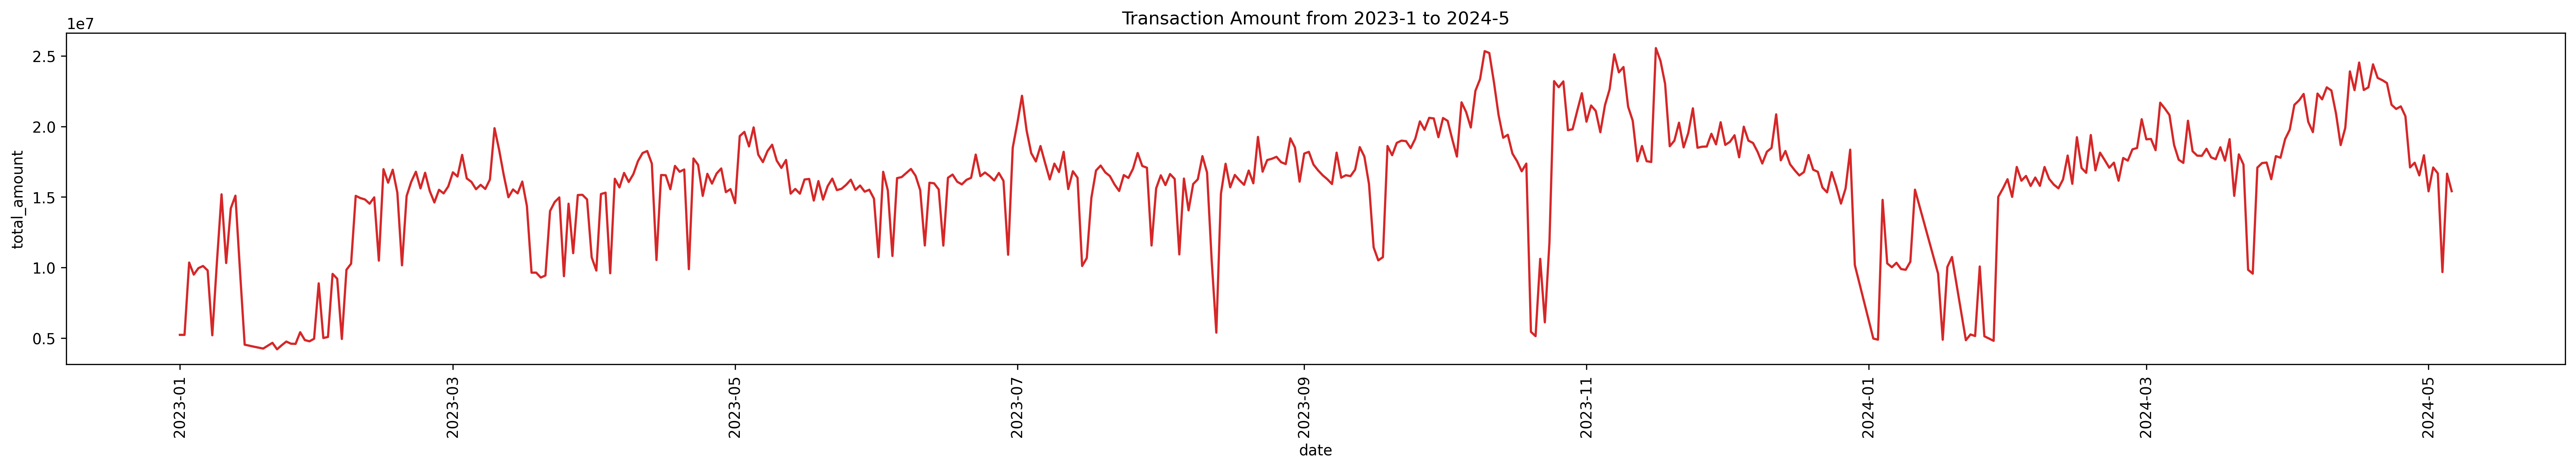

In [31]:
def plot_df(df, x, y, title="", xlabel='date', ylabel='total_amount', dpi=300):
    plt.figure(figsize=(30,4), dpi=dpi) 
    plt.plot(x, y, color='tab:red')
    plt.xticks(rotation=90) 
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['date'], y=df['total_amount'], title='Transaction Amount from 2023-1 to 2024-5')


In [32]:
df.set_index('date', inplace=True)

### Stationarity

In [33]:
import statsmodels.tsa.stattools as sts 

sts.adfuller(df.total_amount)

(-3.93826520382782,
 0.0017706048283337868,
 8,
 470,
 {'1%': -3.4443401584716296,
  '5%': -2.867709127168354,
  '10%': -2.5700559076505205},
 14827.231588685763)

### Seasonailty

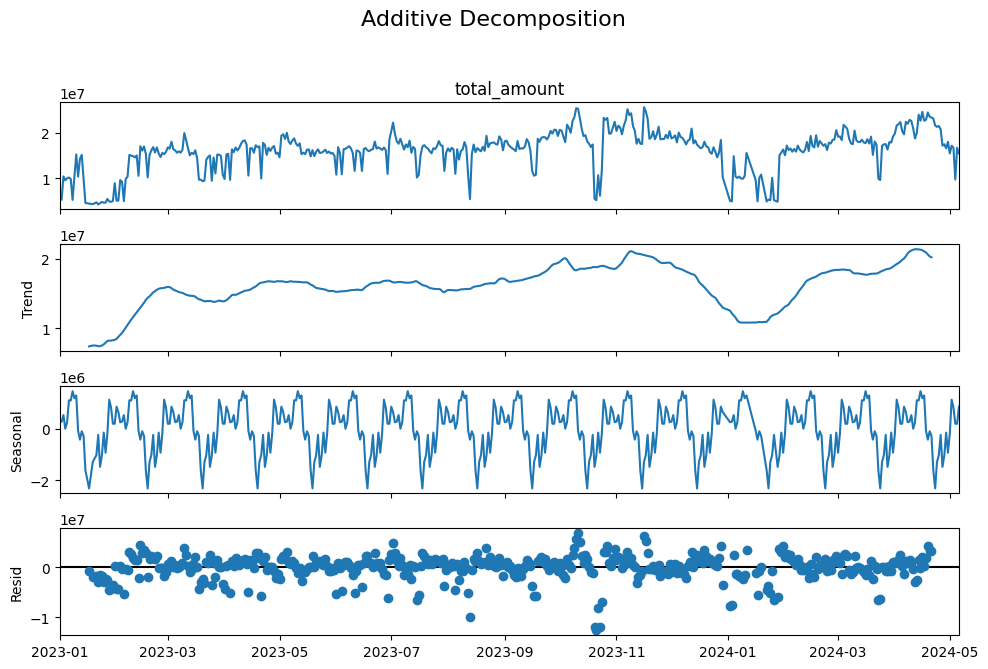

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
# from dateutil.parser import parse

additive_decomposition = seasonal_decompose(df['total_amount'], model='additive', period=30)
# multiplicative_decomposition = seasonal_decompose(df['total_amount'], model='multiplicative', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (10,7)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
# multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

#### ACF and PACF

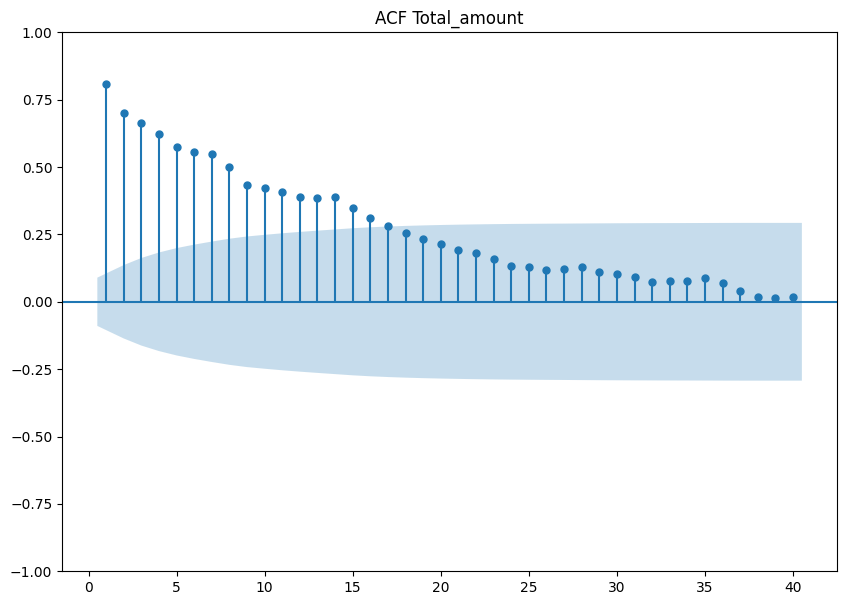

In [40]:
import statsmodels.graphics.tsaplots as sgt 

sgt.plot_acf(df.total_amount, lags = 40, zero= False)
plt.title("ACF Total_amount")
plt.show()

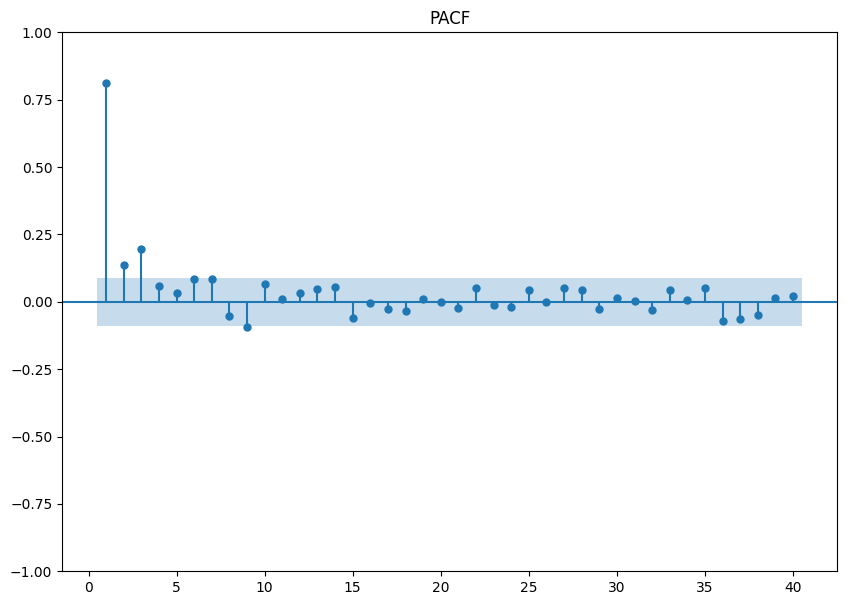

In [43]:
sgt.plot_pacf(df.total_amount, lags = 40, zero= False, method=('ols'))
plt.title("PACF")
plt.show()